In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [55]:
import pandas as pd
data = pd.read_csv('hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [56]:
y = data['label']
x = data.drop(columns = ['label'])

In [57]:
tabular_data = pd.read_csv('HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [58]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

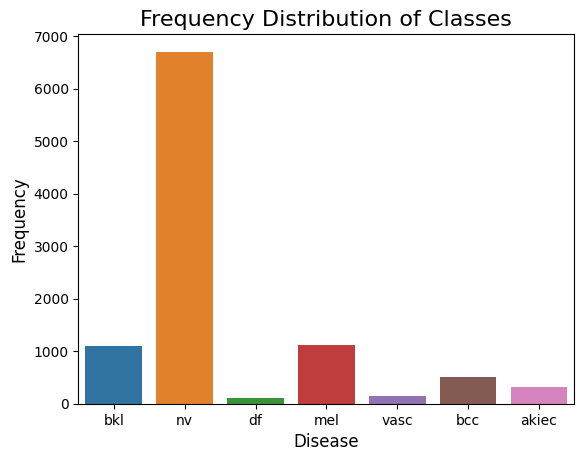

In [59]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

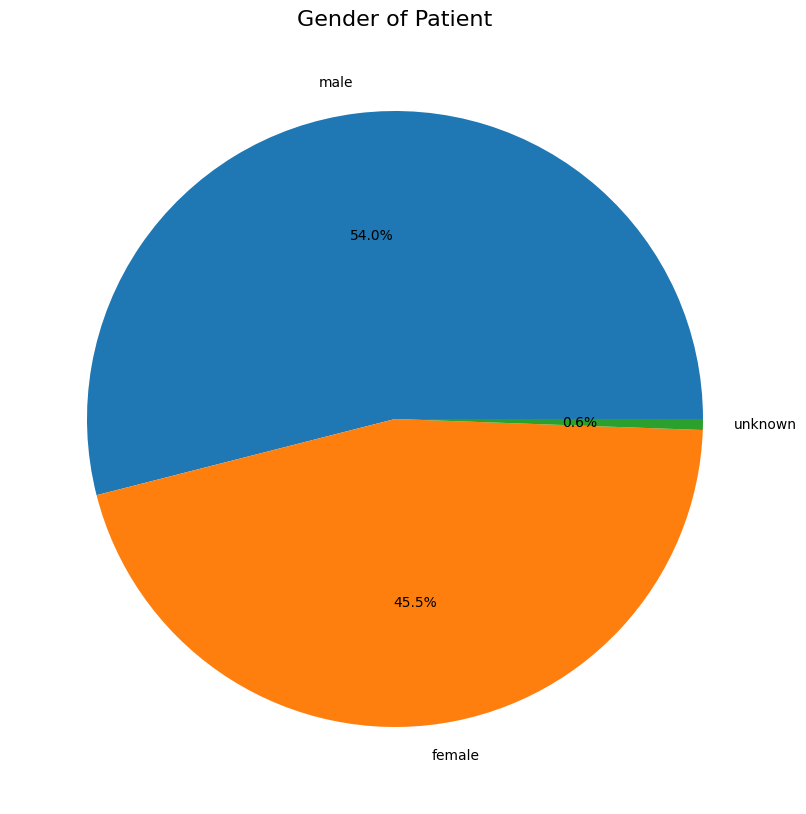

In [60]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

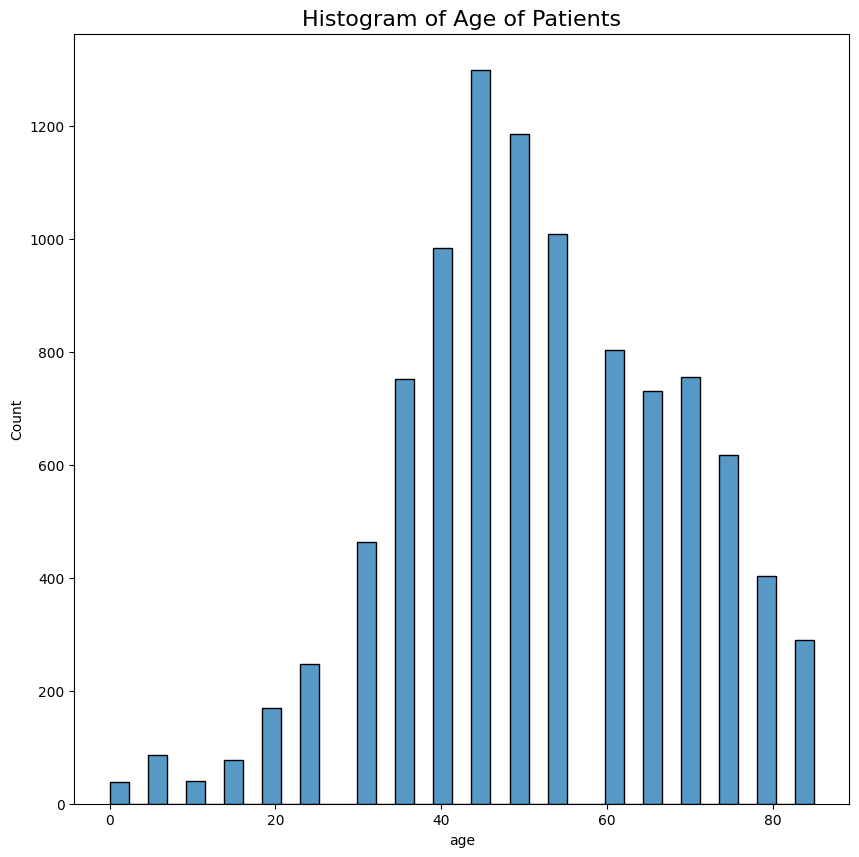

In [61]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

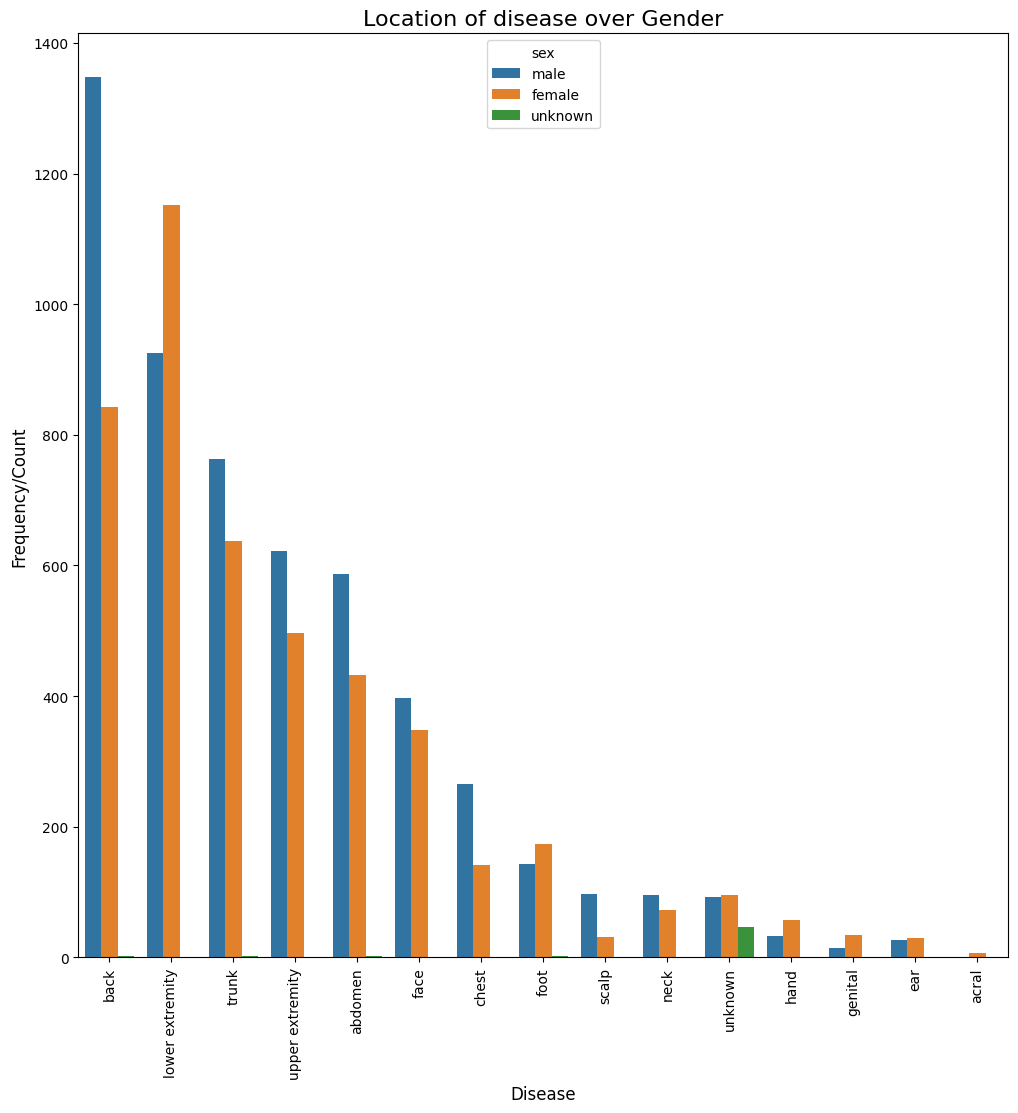

In [62]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [63]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)


In [13]:
print(y)

0        2
1        2
2        2
3        2
4        2
        ..
46930    6
46931    6
46932    6
46933    6
46934    6
Name: label, Length: 46935, dtype: int64


In [ ]:
# Drop rows with NaN values from y and corresponding rows in x
y = y.dropna()
x = x.dropna()

# Perform oversampling
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)
print(y)


0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
6649    5.0
6650    5.0
6651    5.0
6652    5.0
6653    5.0
Name: label, Length: 6654, dtype: float64


In [64]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [65]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [67]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='skin_cencer_model.keras',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [69]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 15,
                    callbacks=[callback])

Epoch 1/15
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4321 - loss: 1.4514
Epoch 1: saving model to skin_cencer_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.4332 - loss: 1.4491 - val_accuracy: 0.7112 - val_loss: 0.7952
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7502 - loss: 0.6885
Epoch 2: saving model to skin_cencer_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7503 - loss: 0.6882 - val_accuracy: 0.8250 - val_loss: 0.4877
Epoch 3/15
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8448 - loss: 0.4312
Epoch 3: saving model to skin_cencer_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.8449 - loss: 0.4309 - val_accuracy: 0.8695 - val_loss: 0.3591
Epoch 4/15
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8978 - loss: 0.2944
Epoch 4: saving model to skin_cencer_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8979 - loss: 0.2942 - val_accuracy: 0.9029

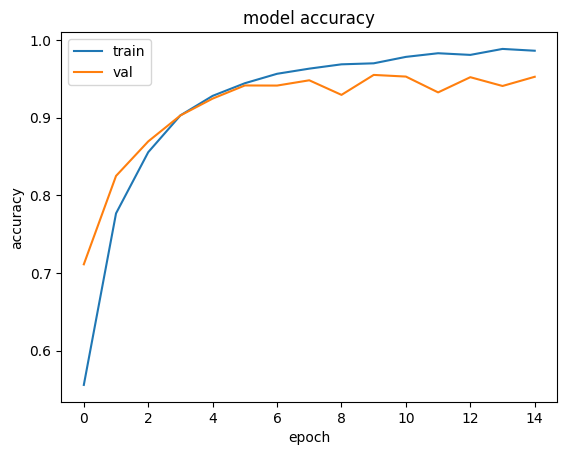

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

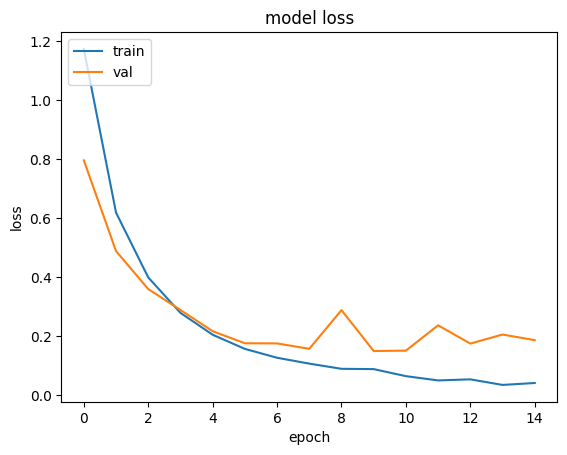

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
model.load_weights('skin_cencer_model.keras')

In [89]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 2s - 6ms/step - accuracy: 0.9507 - loss: 0.1927


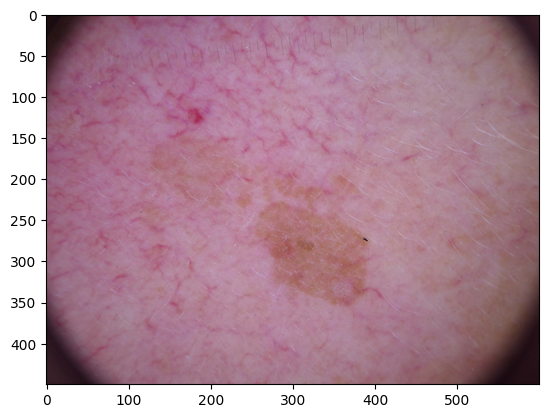

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
('mel', 'melanoma')


In [98]:
import cv2
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('skin_cencer_model.keras')

# Define the class labels
classes = {
    4: ('nv', 'melanocytic nevi'),
    6: ('mel', 'melanoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    1: ('bcc', 'basal cell carcinoma'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    3: ('df', 'dermatofibroma')
}

model = tf.keras.models.load_model('skin_cencer_model.keras')
temp = 'HAM10000_images_part_1\ISIC_0029270.jpg'
img = cv2.imread( temp)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img_resized = cv2.resize(img, (28, 28))
result = model.predict(img_resized.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
print(class_name)

    

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model('skin_cencer_model.keras')

def skin_cancer_classification(img):
    classes = {
    4: ('nv', 'melanocytic nevi'),
    6: ('mel', 'melanoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    1: ('bcc', 'basal cell carcinoma'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    3: ('df', 'dermatofibroma')
    }
    img_resized = cv2.resize(img, (28, 28))
    result = model.predict(img_resized.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)

temp = 'ISIC_0027513.jpg'
img = cv2.imread( temp)

skin_cancer_classification(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
('mel', 'melanoma')
